# Techno-Economic Analysis using Aluminum as Long Duration Energy Storage inside a Renewable Energy Grid


## <center>*I. TEA using Aluminum as energy storage with dynamic operation modeling*</center>
Using generalized model of two super-imposed sine waves to simulate short- and long-term variations of both Solar and Wind energy supply, and integrate, present an economic assessment of the interrelationship between the dynamics of energy supply and the flexibility of aluminum production. A thermal model of the H-H Aluminum Smelter is utilized and integrated with the energy supply to produce results of Costs of Aluminum ($/Kg) as a function of fraction reduction in energy during lean months. Compare the results to other methods to determin its economic feasability.

## <center>*II. Case study for Quebec:*<center>

Concider a remote mine in Northern Quebec which requires 25MW of baseload power generation system. However, the current provincial grid does not have the surplus to provide the required power, so the mine has to operate fully off-grid. Additionally, it is not in an ideal location for wind and solar energy production due to its geography in a fully clean energy scenario. Thus, renewable energy is produced at another location rich in solar and wind energy. 

## Assumptions:

* All possible hydroelectricity potential is fully used for the provincial power grid, so only Solar and Wind are for consideration.
* The number of trips to deliver the Aluminum energy storage unit is limited to twice per year to reduce the shipping cost.
* The mine's operational lifespan is 10 years — all equipment is amortized over the same period
* Wind turbine model SG 2.1-114 is used for Wind Energy Proposal

## Goal

1. List 1
2. List 2

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (6,6), 'axes.edgecolor': '0.2'})

In [11]:
provinces = gpd.read_file("provinces")

In [12]:
provinces = provinces.to_crs("EPSG:4326")
provinces


,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-88.86612 56.84777, -88.86838 ..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((-94.82341 59.99352, -94.82398 ..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((-109.63750 60.00006, -109.62500 60.0..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((-110.00000 59.95257, -110.00000 59.9..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


In [13]:
provinces.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PRUID     13 non-null     object  
 1   PRNAME    13 non-null     object  
 2   PRENAME   13 non-null     object  
 3   PRFNAME   13 non-null     object  
 4   PREABBR   13 non-null     object  
 5   PRFABBR   13 non-null     object  
 6   geometry  13 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 856.0+ bytes


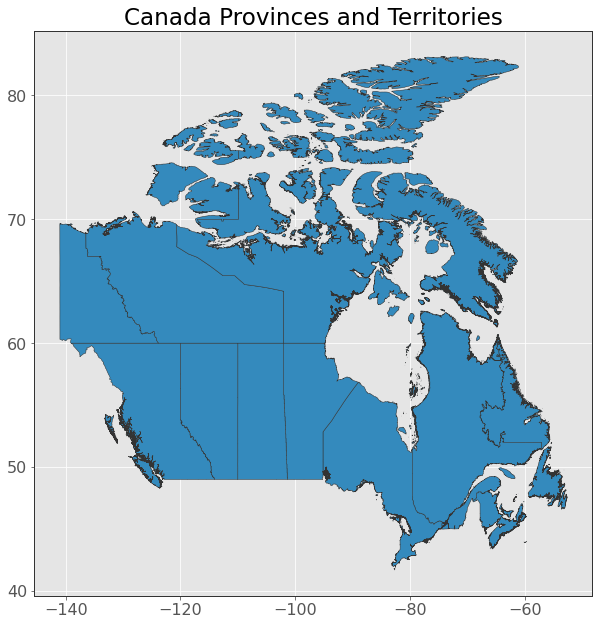

In [25]:
provinces.plot(edgecolor="0.2", figsize=(10, 20))
plt.title("Canada Provinces and Territories");

In [69]:
Montreal = pd.DataFrame(
    {"City": ["Montreal"],
    "Population": [1_749_600],
    "Latitude": [45.5017],
     "Longitude": [-73.5673],
    }
)
Saguenay = pd.DataFrame(
    {"City": ["Saguenay"],
    "Population": [144_000],
    "Latitude": [48.4160],
     "Longitude": [-71.2490],
    }
)

P = pd.DataFrame(
    {"City": ["Proposed Aluminum Production Plant"],
    "Population": [1_000],
    "Latitude": [50.1768],
     "Longitude": [-66.3633],
    }
)


In [71]:
Montreal = gpd.GeoDataFrame(Montreal,
                           crs="EPSG:4326",
                           geometry=gpd.points_from_xy(Montreal["Longitude"], Montreal["Latitude"]))
Montreal

Saguenay = gpd.GeoDataFrame(Saguenay,
                           crs="EPSG:4326",
                           geometry=gpd.points_from_xy(Saguenay["Longitude"], Saguenay["Latitude"]))

P = gpd.GeoDataFrame(P,
                           crs="EPSG:4326",
                           geometry=gpd.points_from_xy(P["Longitude"], P["Latitude"]))
P

,City,Population,Latitude,Longitude,geometry
0,Proposed Aluminum Production Plant,1000,50.1768,-66.3633,POINT (-66.36330 50.17680)


<AxesSubplot:>

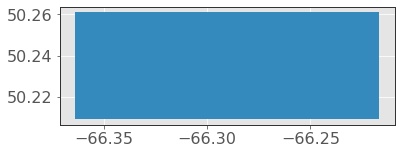

In [66]:

from shapely.geometry import Polygon

# Define the coordinates of the rectangle
min_lon = -66.3640
max_lon = -66.2165
min_lat = 50.2091
max_lat = 50.2611

# Create a Polygon geometry
polygon_geom = Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])

# Convert the Polygon to a GeoDataFrame
polygon_gdf = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom])


polygon_gdf.plot()

Text(43.5, 0.5, 'Latitude')

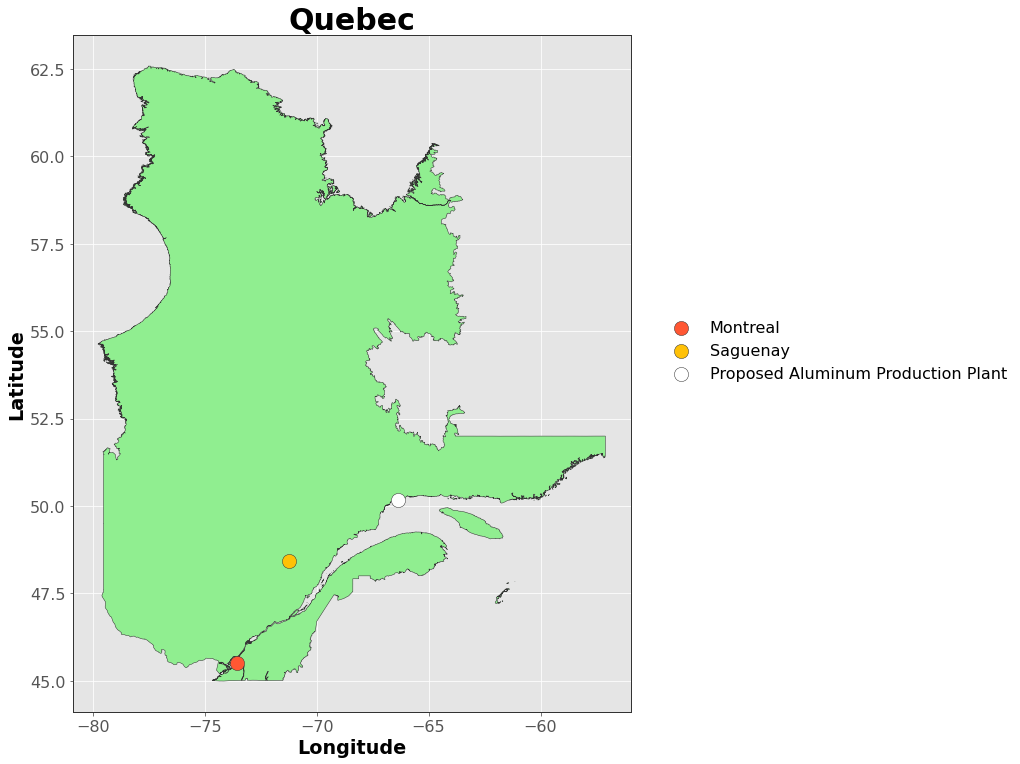

In [96]:
name = provinces.iloc[4]["PRENAME"]
ax=provinces.iloc[[4]].plot(edgecolor="0.2", figsize=(10, 20),color='lightgreen')
Montreal.plot(ax=ax, markersize=200, edgecolor="0.2", color=['#FF5733'], label=["Montreal"])
Saguenay.plot(ax=ax, markersize=200, edgecolor="0.2", color=['#FFC107'], label=["Saguenay"])
P.plot(ax=ax, markersize=200, edgecolor="0.2", color=["White"],label=["Proposed Aluminum Production Plant"])
plt.title(name, fontsize=30, fontfamily="sans-serif", fontweight='bold')

# Add a legend outside the graph
#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.legend(['Montreal', 'Saguenay', "Proposed Aluminum Production Plant"], loc='upper right',framealpha=0, bbox_to_anchor=(1.7, 0.6))
plt.xlabel('Longitude', color='black')
plt.ylabel('Latitude', color='black')

